In [1]:
#Importing Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing the datasets
dataset = pd.read_csv('Google_Stock_Price.csv')

In [3]:
#Droping all the NULL values
dataset.set_index("Date", inplace=True)
dataset.dropna(inplace=True)

In [4]:
#Print dataframe shape and check NULL values
print("Dataframe shape: ", dataset.shape)
print("NULL value present: ",dataset.isnull().values.any())


Dataframe shape:  (255, 6)
NULL value present:  False


In [5]:
#Checking the top 5 values from the dataset
dataset.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-06,2222.500000,2237.659912,2214.800049,2224.750000,2224.750000,1353000
2021-04-07,2226.129883,2255.000000,2225.330078,2249.679932,2249.679932,1289900
2021-04-08,2277.959961,2284.004883,2257.679932,2265.439941,2265.439941,1358300
2021-04-09,2256.699951,2289.040039,2253.714111,2285.879883,2285.879883,1044400
2021-04-12,2266.250000,2275.320068,2238.465088,2254.790039,2254.790039,1565900


In [6]:
#Set target variable & Selecting features
output_var=pd.DataFrame(dataset['Close'])
features=['Open','High','Low','Volume']

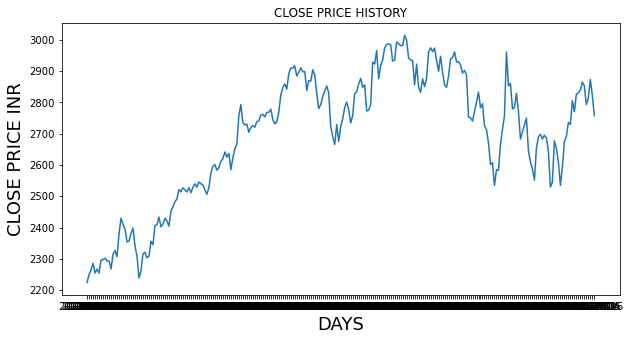

In [7]:
#Ploting Close Price History using matplotlib
import seaborn as sns
plt.figure(figsize=(10,5))
plt.title('CLOSE PRICE HISTORY')
plt.plot(dataset['Close'])
#ax=sns.lineplot(data=df, x='timestamp',y='close', color="blue");
plt.xlabel('DAYS',fontsize=18)
plt.ylabel('CLOSE PRICE INR',fontsize=18)
plt.show()

In [8]:
#Extracting independent and dependent variables
x = dataset.iloc[:, 0:5].values
y = dataset.iloc[:, 4].values

In [9]:
print("x-shape is:",x.shape)
print("y-shape is:",y.shape)

x-shape is: (255, 5)
y-shape is: (255,)


In [10]:
#splitting to training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.26,  random_state=0)

In [11]:
print("x-train is:",x_train.shape)
print("y-train is:",y_train.shape)

x-train is: (188, 5)
y-train is: (188,)


In [12]:
print("x-test is:",x_test.shape)
print("y-test is:",y_test.shape)

x-test is: (67, 5)
y-test is: (67,)


In [13]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
feature_transform = scaler.fit_transform(dataset[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=dataset.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2021-04-06,0.000000,0.000000,0.000000,0.250554
2021-04-07,0.004455,0.021558,0.013449,0.235467
2021-04-08,0.068068,0.057619,0.054767,0.251821
2021-04-09,0.041975,0.063879,0.049702,0.176769
2021-04-12,0.053696,0.046821,0.030225,0.301458


In [14]:
#Random forest for regression
from sklearn.ensemble import RandomForestRegressor
#Random forest builds decision trees on different samples, gets predictions from each tree
#and select the best solution by means of average in case of regression
Random_forest_model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, 
                                            min_samples_leaf=1, max_depth=10, bootstrap=True)
Random_forest_model.fit(x_train, y_train)
RF_predict = Random_forest_model.predict(x_test)
print(RF_predict)

[2984.4823901  2723.47027846 2874.22861941 2887.33644    2986.74529441
 2716.74290486 2820.15960356 2695.48806586 2591.57377823 2832.70047138
 2970.69078946 2672.25170732 2899.21748349 2899.62074757 2934.76879264
 2615.49997514 2660.88407681 2961.7162547  2985.51358834 2822.14312209
 2897.87780284 2509.46121673 2735.84820632 2848.59534916 2838.6289916
 2759.71474359 2297.04349858 2530.16816708 2654.58673341 2413.56334993
 2831.72391484 2672.3957961  2870.18234067 2794.75849068 2873.96781382
 2962.51242905 2921.96004827 2263.41925485 2368.09140514 2752.69305641
 2728.04162836 2275.18708339 2929.43328183 2856.44609112 2767.36876449
 2783.27858407 2611.11442736 2495.08010738 2605.63028507 2937.83708889
 2637.26874752 2934.31876773 2992.57801323 2758.54481191 2520.99746779
 2829.83882841 2648.57415435 2408.98726699 2585.136728   2312.09300451
 2985.85386128 2648.47610708 2294.86991608 2754.0009006  2963.92419662
 2865.08615216 2348.16612248]


In [15]:
print(RF_predict.shape)

(67,)


In [16]:
dataset=pd.DataFrame({'Actual':y_test, 'Predicted':RF_predict})
dataset

,Actual,Predicted
0,2981.239990,2984.482390
1,2725.600098,2723.470278
2,2875.929932,2874.228619
3,2891.010010,2887.336440
4,2984.820068,2986.745294
...,...,...
62,2296.659912,2294.869916
63,2753.790039,2754.000901
64,2961.280029,2963.924197
65,2865.000000,2865.086152


In [17]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, RF_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, RF_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,RF_predict)))

Mean Absolute Error: 3.1670139392063468
Mean Squared Error: 26.26255648796762
Root Mean Squared Error: 5.124700624228465


In [18]:
RF_result=Random_forest_model.score(x_test,y_test)*100

In [19]:
print("Accuracy: ",round(RF_result,2),'%')

Accuracy:  99.94 %


In [20]:
#Decision tree for regression
from sklearn.tree import DecisionTreeRegressor
# Decision tree create a model that predicts the value of a target variable, 
# for which the decision tree uses the tree representation to solve the problem 
# in which the leaf node corresponds to a class label and attributes are represented on the internal node of the tree.
DecisionTreemodel = DecisionTreeRegressor( random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10)
DecisionTreemodel.fit(x_train, y_train)
DT_predict = DecisionTreemodel.predict(x_test)
print(DT_predict)

[2987.030029 2725.810059 2875.47998  2887.469971 2987.030029 2713.969971
 2821.26001  2704.419922 2593.209961 2836.530029 2973.5      2673.810059
 2897.669922 2897.669922 2934.090088 2625.330078 2653.639893 2960.72998
 2987.030029 2821.26001  2895.5      2506.320068 2738.27002  2849.040039
 2832.360107 2757.570068 2293.629883 2529.290039 2665.310059 2409.070068
 2836.530029 2673.810059 2868.120117 2793.439941 2872.850098 2962.120117
 2922.580078 2265.439941 2379.909912 2751.02002  2729.570068 2265.439941
 2928.959961 2855.610107 2768.73999  2784.26001  2609.51001  2466.090088
 2601.840088 2942.850098 2641.649902 2934.959961 2992.909912 2757.570068
 2520.659912 2830.429932 2666.570068 2411.560059 2585.080078 2303.429932
 2987.030029 2641.649902 2293.629883 2751.02002  2960.72998  2868.120117
 2341.659912]


In [21]:
print(DT_predict.shape)

(67,)


In [22]:
dataset=pd.DataFrame({'Actual':y_test, 'Predicted':DT_predict})
dataset

,Actual,Predicted
0,2981.239990,2987.030029
1,2725.600098,2725.810059
2,2875.929932,2875.479980
3,2891.010010,2887.469971
4,2984.820068,2987.030029
...,...,...
62,2296.659912,2293.629883
63,2753.790039,2751.020020
64,2961.280029,2960.729980
65,2865.000000,2868.120117


In [23]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, DT_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, DT_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,DT_predict)))

Mean Absolute Error: 3.7829262089552103
Mean Squared Error: 39.86167773950931
Root Mean Squared Error: 6.313610515347721


In [24]:
DT_result=DecisionTreemodel.score(x_test,y_test)*100

In [25]:
print("Accuracy: ",round(DT_result,2),'%')

Accuracy:  99.91 %


In [26]:
# K Neighbor Algorithm
from sklearn.neighbors import KNeighborsRegressor
# K neighbor finds the distances between a query and all the examples in the data, 
# selecting the specified number examples (K) closest to the query, 
# then averages  the most frequent labels (in the case of regression)
knn_Model = KNeighborsRegressor(n_neighbors=7)
knn_Model.fit(x_train,y_train)
knn_predict=knn_Model.predict(x_test)
print(knn_predict)

[2982.397147   2725.31860357 2864.51283471 2885.83572814 2982.397147
 2729.53717914 2818.851423   2697.67714143 2590.26000971 2842.23999029
 2959.26286971 2673.69855614 2899.711391   2900.562814   2933.37004757
 2600.04143414 2641.73856029 2945.51147471 2982.397147   2813.56713857
 2898.12280286 2517.36289771 2720.92431643 2851.18143143 2848.33290314
 2764.70717086 2307.27852957 2534.15708714 2681.19569629 2413.63856729
 2841.157122   2685.90426214 2862.70427586 2786.501465   2863.47000557
 2951.80716386 2924.43289629 2265.04143414 2373.598563   2787.66001671
 2720.92431643 2272.83426343 2924.43289629 2855.195731   2767.23001529
 2781.355713   2619.18282657 2508.65576186 2599.86143271 2925.26143986
 2641.73856029 2929.65433186 2982.397147   2751.85574771 2524.067104
 2837.84427314 2637.69287114 2411.25714986 2584.33000829 2310.361363
 2974.18572114 2641.73856029 2301.13853243 2760.08286843 2950.12716243
 2862.70427586 2337.18854629]


In [27]:
print(knn_predict.shape)

(67,)


In [28]:
dataset=pd.DataFrame({'Actual':y_test, 'Predicted':knn_predict})
dataset

,Actual,Predicted
0,2981.239990,2982.397147
1,2725.600098,2725.318604
2,2875.929932,2864.512835
3,2891.010010,2885.835728
4,2984.820068,2982.397147
...,...,...
62,2296.659912,2301.138532
63,2753.790039,2760.082868
64,2961.280029,2950.127162
65,2865.000000,2862.704276


In [29]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, knn_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, knn_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,knn_predict)))

Mean Absolute Error: 8.65179039872072
Mean Squared Error: 140.07501012754955
Root Mean Squared Error: 11.835328898156973


In [30]:
knn_result=knn_Model.score(x_test,y_test)*100

In [31]:
print("Accuracy: ",round(knn_result,2),'%')

Accuracy:  99.67 %


In [32]:
# Comparing accuracy for various machine learning algorithms
Model = ['RANDOM FOREST','DECISION TREE','K- NEIGHBOUR']
accuracy = [RF_result,DT_result,knn_result]

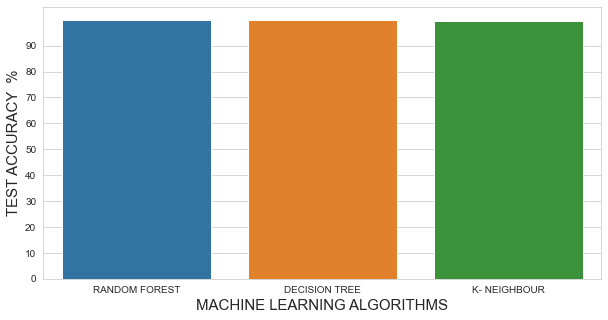

In [33]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("TEST ACCURACY  %",fontsize=15)
plt.xlabel("MACHINE LEARNING ALGORITHMS", fontsize=15)
sns.barplot(x= Model, y= accuracy)
plt.show()

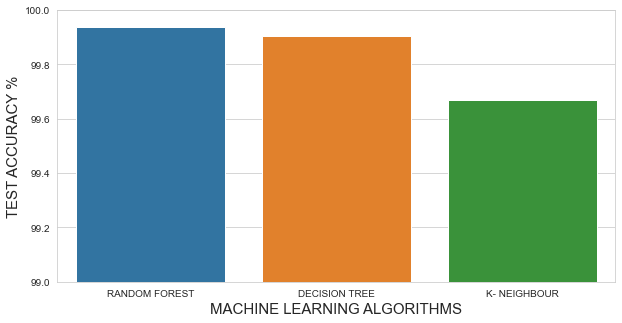

In [34]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.ylim(99,100)
plt.ylabel("TEST ACCURACY %",fontsize=15)
plt.xlabel("MACHINE LEARNING ALGORITHMS",fontsize=15)
sns.barplot(x= Model, y= accuracy)
plt.show()